<div class="alert alert-block alert-info" style="text-align:center;">
   <h1 style="font-size: 24px;">HW3 - Image Filtering</h1>
</div>

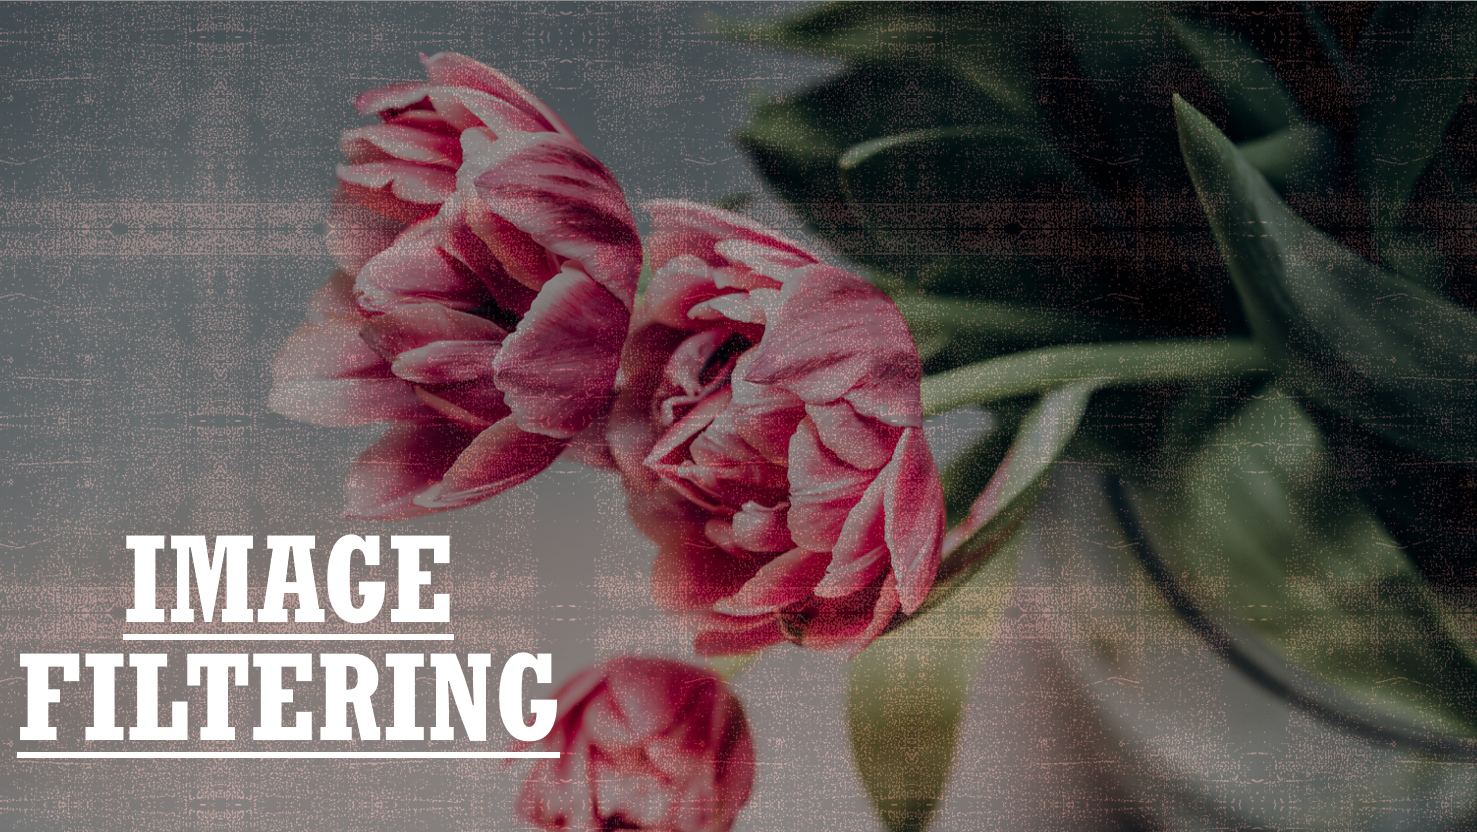

## Import Required Libraries

In [1]:
import matplotlib.pyplot as plt
import cv2
import os
import cv2
import numpy as np
import requests
from io import BytesIO
from IPython.display import Image
from matplotlib import cm

# 1. Apply Averaging filter of image eye2_1 with 
## Uniform weights: [1 1 1; 1 1 1; 1 1 1]* (1/9) and
## nonuniform weights: [1 2 1; 2 4 2; 1 2 1]* (1/16) 

Text(0.5, 1.0, 'Non Uniform Masked Average Image')

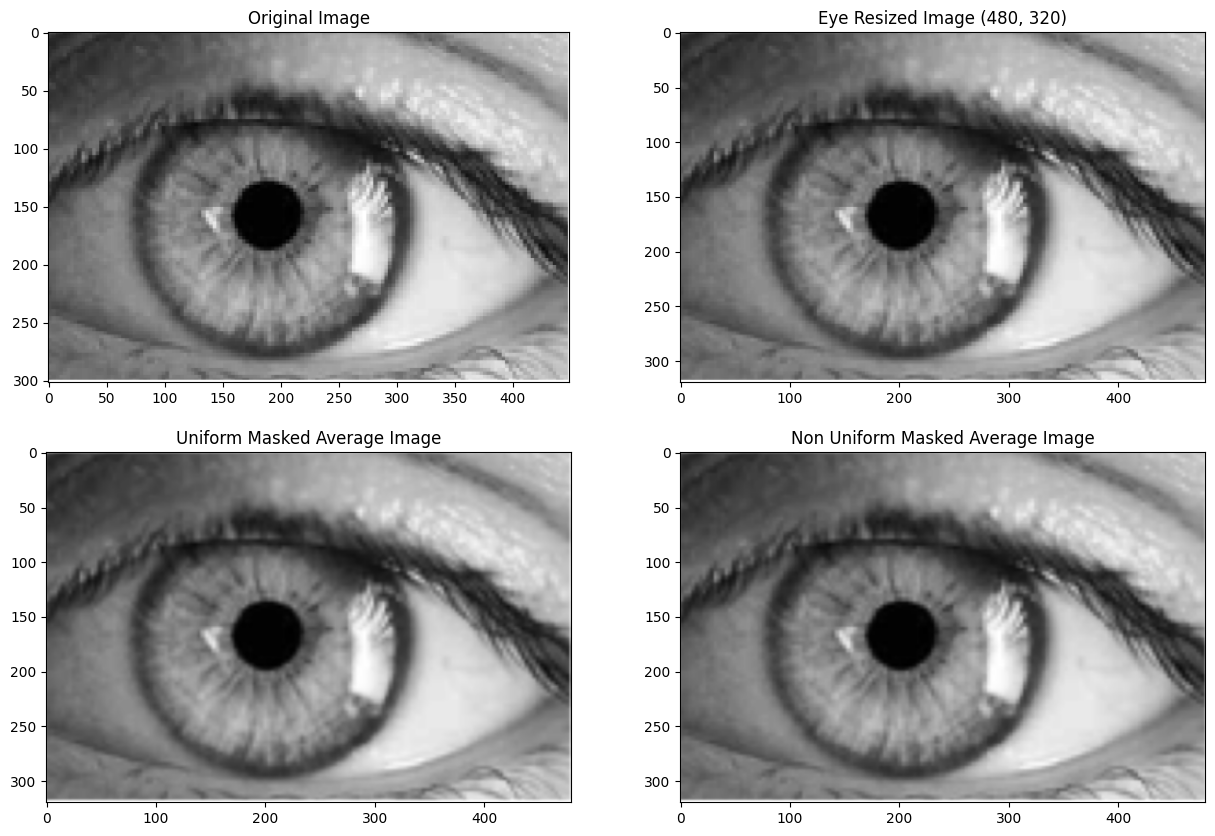

<Figure size 2000x500 with 0 Axes>

In [2]:
#Read image from GIT location and store it into a variable
image_url = "https://raw.githubusercontent.com/ankitagg2008/DLNN/313cb86529ce6c6fa3c04679e84cfa8ac9fd72e2/Homework3/eye2_1.png"
response = requests.get(image_url)
org_image = cv2.imdecode(np.frombuffer(response.content, np.uint8), cv2.IMREAD_COLOR)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Resize / Change its dimensions and display
eye_resized_image = cv2.resize(org_image,(480, 320)) ;

# Define a uniform filter mask
uniform_mask_filter = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]]) / 9
# Apply the uniform filter using OpenCV
uniform_mask_average_image = cv2.filter2D(eye_resized_image, -1, uniform_mask_filter)

# Define a non-uniform filter mask with custom weights
non_uniform_mask_filter = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]], dtype=np.float32) / 16
# Apply the non uniform filter using OpenCV
non_uniform_mask_average_image = cv2.filter2D(eye_resized_image, -1, non_uniform_mask_filter)

# Display the Original, Uniform Filtered & Non Uniform Filtered Images
plt.figure(figsize=[20, 5])
axes[0,0].imshow(org_image);axes[0,0].set_title("Original Image")
axes[0,1].imshow(eye_resized_image);axes[0,1].set_title("Eye Resized Image (480, 320)")
axes[1,0].imshow(uniform_mask_average_image);axes[1,0].set_title("Uniform Masked Average Image")
axes[1,1].imshow(non_uniform_mask_average_image);axes[1,1].set_title("Non Uniform Masked Average Image")

# 2. Show the 3D Gaussian function

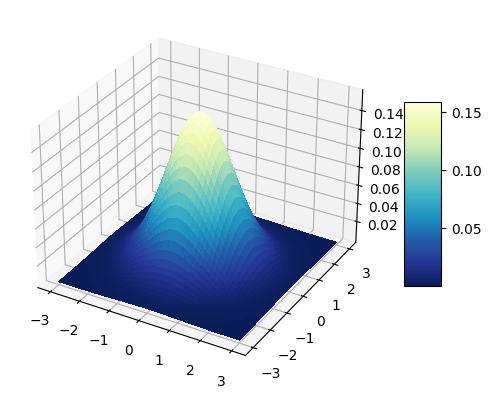

In [3]:
N = 3.0
u = np.linspace(-N, N)
v=u

# Make data.
X, Y = np.meshgrid(u, v)
z = 1 / (2 * np.pi) * np.exp(-0.5 * (X**2 + Y**2))  # sigma = 1 # Calculate the Gaussian function values

# Plot 3D Gaussian Function using Matplotlib
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Plot the surface.
surf = ax.plot_surface(X, Y, z, cmap=plt.cm.YlGnBu_r, linewidth=0, antialiased=False) #cm.coolwarm

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

# 3. Apply Gaussian image filtering of image eye2_1 

Text(0.5, 1.0, 'Eye Resized Image (480, 320)')

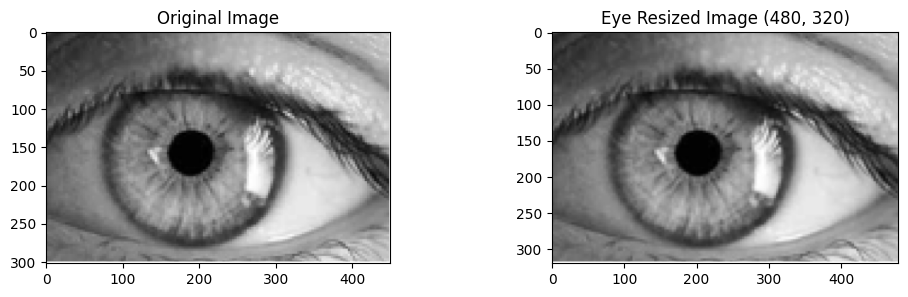

In [4]:
# Refer Original Image from Above Point No. 1 and display
# Refer Resized Image from Above Point No. 1 and display

# Display the Original, Uniform Filtered & Non Uniform Filtered Images
plt.figure(figsize=[12, 3])
plt.subplot(121);plt.imshow(org_image);plt.title("Original Image")
plt.subplot(122);plt.imshow(eye_resized_image, cmap='gray');plt.title("Eye Resized Image (480, 320)")

In [5]:
def gaussian_filtering(sigma):
    filtered_images = []
    hsize = 30
    for s in sigma:
        # Create a Gaussian kernel
        h = cv2.getGaussianKernel(hsize, s)
        
        # Apply the Gaussian filter to the resized image
        filtered_image = cv2.filter2D(eye_resized_image, -1, h)
        filtered_images.append(filtered_image)  # Append the filtered image to the list
    return filtered_images

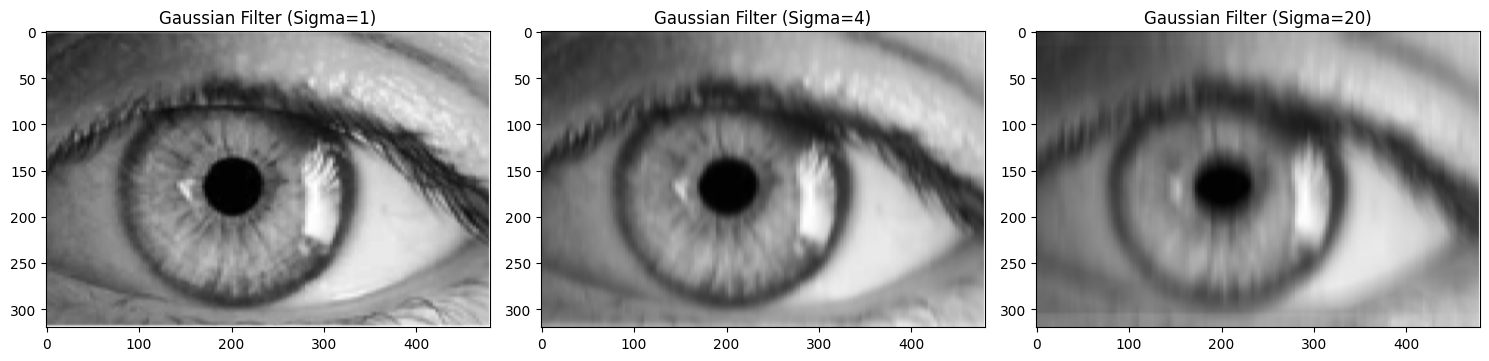

In [6]:
sigmas = [1, 4, 20]

# Apply Gaussian filtering with different sigma values
filtered_images = gaussian_filtering(sigmas)

# Plot the filtered images
plt.figure(figsize=[15, 8])
for i, s in enumerate(sigmas):
    plt.subplot(1, len(sigmas), i + 1)
    plt.imshow(filtered_images[i], cmap='gray');plt.title(f'Gaussian Filter (Sigma={s})')

# Adjust spacing
plt.tight_layout()

# Display the plots
plt.show()

# 4. Apply Unsharp mask of image eye2_1 

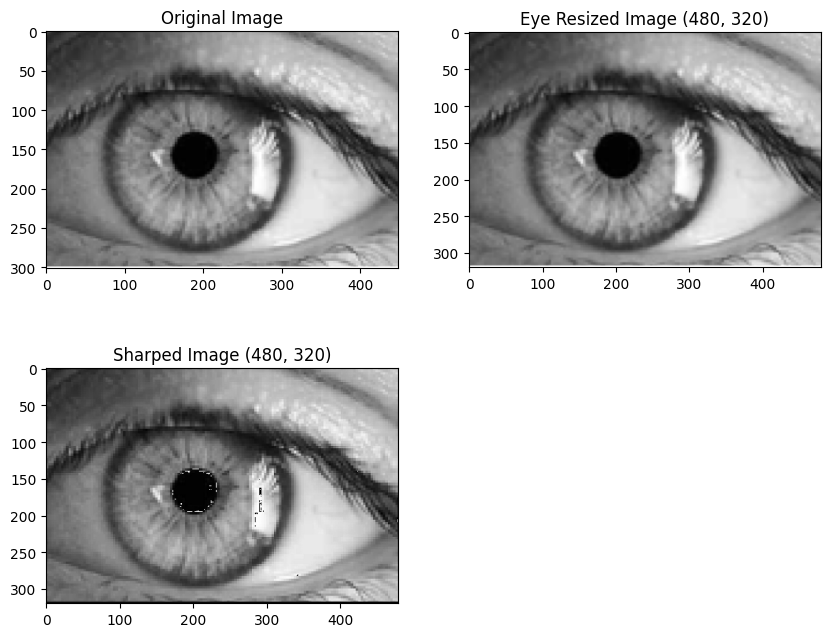

In [7]:
# Display the Original, Uniform Filtered & Non Uniform Filtered Images
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes[0, 0].imshow(org_image);axes[0, 0].set_title("Original Image")
axes[0, 1].imshow(eye_resized_image, cmap='gray');axes[0, 1].set_title("Eye Resized Image (480, 320)")

# Calculate the sharpened image
sharpImg = eye_resized_image + (eye_resized_image - uniform_mask_average_image)
axes[1, 0].imshow(sharpImg);axes[1, 0].set_title("Sharped Image (480, 320)")

fig.delaxes(axes[1, 1])


# 5. Remove noise of noise_bridge image using
## Gaussain filter
## Uniform filter
## Median filter

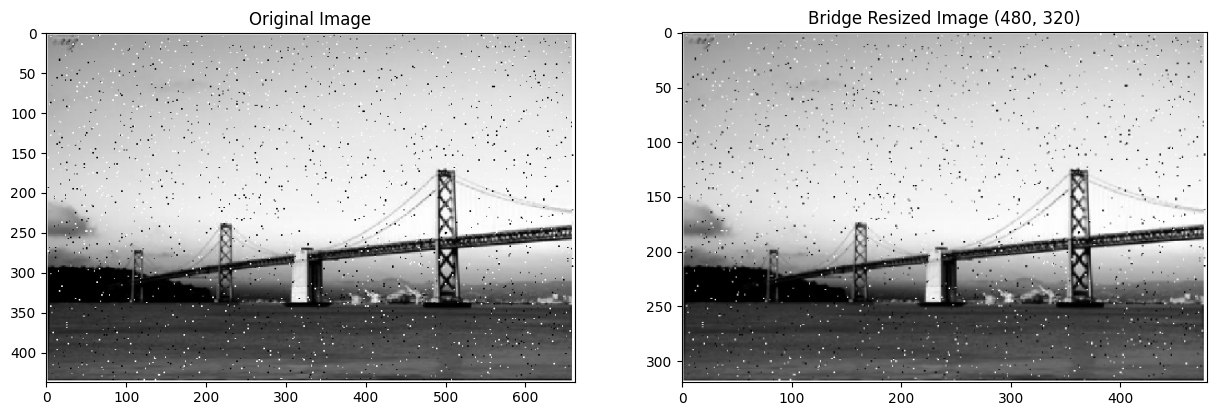

In [8]:
#Read image from GIT location and store it into a variable
image_url = "https://raw.githubusercontent.com/ankitagg2008/DLNN/313cb86529ce6c6fa3c04679e84cfa8ac9fd72e2/Homework3/noise_bridge.png"
response = requests.get(image_url)
org_image = cv2.imdecode(np.frombuffer(response.content, np.uint8), cv2.IMREAD_COLOR)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Resize / Change its dimensions and display
bridge_resized_image = cv2.resize(org_image,(480, 320)) ;

# Display the Original, Uniform Filtered & Non Uniform Filtered Images
axes[0,0].imshow(org_image);axes[0,0].set_title("Original Image")
axes[0,1].imshow(bridge_resized_image);axes[0,1].set_title("Bridge Resized Image (480, 320)")

fig.delaxes(axes[1, 0])
fig.delaxes(axes[1, 1])

### Gaussain filter, Uniform filter, Median filter

In [9]:
hsize =3
sigma =10
h = cv2.getGaussianKernel (hsize , sigma )
gImg = cv2.filter2D( bridge_resized_image ,-1, h)

mask1 = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]]) / 9
averageImg = cv2.filter2D( bridge_resized_image ,-1, mask1)

medImg = cv2.medianBlur( bridge_resized_image, 3)

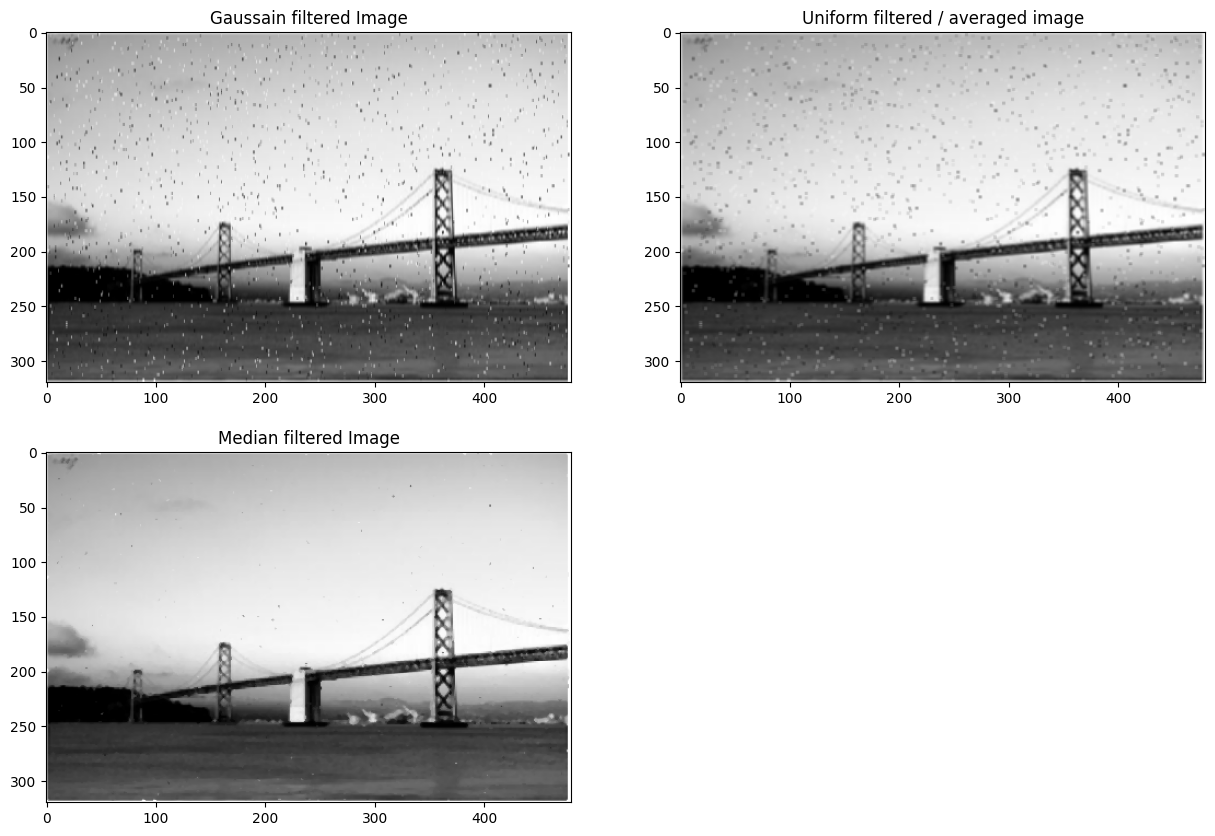

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes[0,0].imshow(gImg);axes[0,0].set_title("Gaussain filtered Image")
axes[0,1].imshow(averageImg);axes[0,1].set_title("Uniform filtered / averaged image")
axes[1,0].imshow(medImg);axes[1,0].set_title("Median filtered Image")

fig.delaxes(axes[1, 1])

In [11]:
import requests
import cv2
import numpy as np

# GitHub raw image URL
image_url = "https://raw.githubusercontent.com/ankitagg2008/DLNN/cdc0381e371b9ab27512cf9ce02c7b1eea74ad85/images/orgpic.jpg"

# Send a GET request to the URL
response = requests.get(image_url)

# Check if the request was successful
if response.status_code == 200:
    # Read the image from the response content
    org_image = cv2.imdecode(np.frombuffer(response.content, np.uint8), cv2.IMREAD_COLOR)
    
    # Check the shape of the image
    print("org pic:", org_image.shape)
else:
    print("Failed to retrieve the image. HTTP Status Code:", response.status_code)


org pic: (786, 825, 3)


Text(0.5, 1.0, 'org_resize Image')

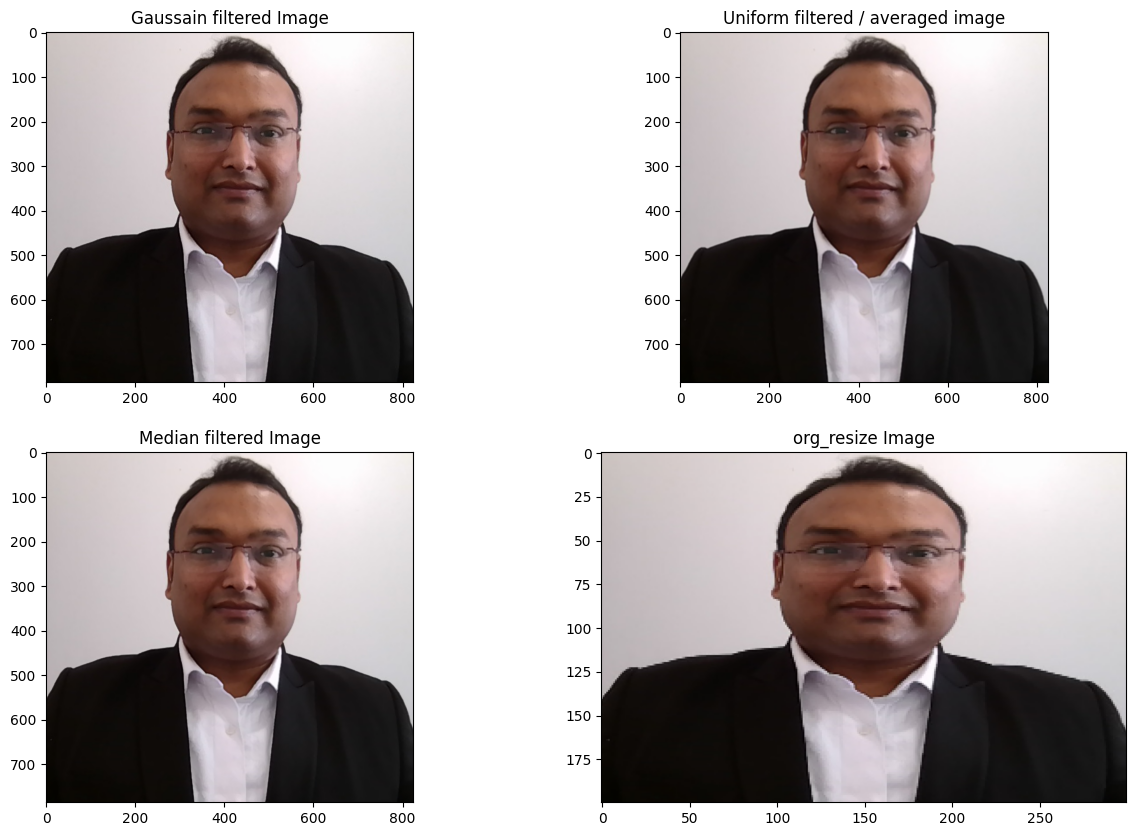

In [21]:
hsize =3
sigma =10
h = cv2.getGaussianKernel (hsize , sigma )
gImg = cv2.filter2D( bridge_resized_image ,-1, h)

mask1 = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]]) / 9
averageImg = cv2.filter2D( org_image ,-1, mask1)

medImg = cv2.medianBlur( org_image, 3)

resizeDownWidth = 300
resizeDownHeight = 200
resizedDown = cv2.resize(org_image, (resizeDownWidth, resizeDownHeight), interpolation= cv2.INTER_LINEAR)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes[0,0].imshow(org_image[...,::-1]);axes[0,0].set_title("Gaussain filtered Image")
axes[0,1].imshow(averageImg[...,::-1]);axes[0,1].set_title("Uniform filtered / averaged image")
axes[1,0].imshow(medImg[...,::-1]);axes[1,0].set_title("Median filtered Image")
axes[1,1].imshow(resizedDown[...,::-1]);axes[1,1].set_title("org_resize Image")



# Citations

1. Refer code for Surface Visualization: https://matplotlib.org/stable/gallery/mplot3d/surface3d.html
2. Image Filtering Documentation: https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html